# 1. importing libraries


In [ ]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [1]:
import pandas as pd     # csv file handling
import os   # file manipulation
import shutil   # file manipulation
import matplotlib.pyplot as plt # labelling plots
import tensorflow as tf # model training
import cv2
import imghdr   # checks image extension
import numpy as np

# 2. reading csv files

In [ ]:
# creation of dataframes
csv_train = pd.read_csv("./Image data/Training_Set/RFMid_Training_labels.csv")
csv_test = pd.read_csv("./Image data/Test_Set/RFMid_Testing_labels.csv")
csv_eval = pd.read_csv("./Image data/Evaluation_Set/RFMid_Validation_labels.csv")


# 3. creating subdirectories to place healthy and unhealthy retinal images


In [14]:
# extracting the current directory
directory = os.getcwd()
directory = os.path.join(directory, "Image data\\")
# iterating through the subdirectories
for dir in os.listdir(directory):
    d = os.path.join(directory, dir)
    if os.path.isdir(d):
        # creating subdirectories
        p1 = os.path.join(d, "healthy\\")
        p2 = os.path.join(d, "unhealthy\\")
        os.mkdir(p1)
        os.mkdir(p2)


FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'c:\\Users\\Bhavini\\Git Repos\\RFMiD_py_tf\\Image data\\Evaluation_Set\\healthy\\'

# 4. extracting disease risk data into new dataframes


In [ ]:
# creating new dataframes to contain only ID and Disease Risk
train_risk = csv_train[['ID', 'Disease_Risk']].copy()
test_risk = csv_test[['ID', 'Disease_Risk']].copy()
eval_risk = csv_eval[['ID', 'Disease_Risk']].copy()

# conversion from binary representation to string for easier classification
train_risk['Disease_Risk'] = train_risk['Disease_Risk'].replace(
    1, "healthy").astype(str)
train_risk['Disease_Risk'] = train_risk['Disease_Risk'].replace(
    '0', "unhealthy").astype(str)
test_risk['Disease_Risk'] = test_risk['Disease_Risk'].replace(
    1, "healthy").astype(str)
test_risk['Disease_Risk'] = test_risk['Disease_Risk'].replace(
    '0', "unhealthy").astype(str)
eval_risk['Disease_Risk'] = eval_risk['Disease_Risk'].replace(
    1, "healthy").astype(str)
eval_risk['Disease_Risk'] = eval_risk['Disease_Risk'].replace(
    '0', "unhealthy").astype(str)


# 5. plotting of graphs according to disease to compare


## 5.1. training set


In [ ]:
# creating a new dataframe to make frequency plots
train_plot = csv_train.copy()
# dropping irrelevant columns
train_plot.drop("ID", axis=1, inplace=True)
train_plot.drop("Disease_Risk", axis=1, inplace=True)
# summation of columns
train_plot = train_plot.sum()
# plotting of bar graph
ax = train_plot.plot.bar(figsize=(30, 30))
ax.bar_label(ax.containers[0])
plt.xlabel('Diseases')
plt.ylabel('Frequency')


## 5.2. testing set


In [ ]:
# creating a new dataframe to make frequency plots
test_plot=csv_test.copy()
# dropping irrelevant columns
test_plot.drop("ID",axis=1,inplace=True)
test_plot.drop("Disease_Risk",axis=1,inplace=True)
# summation of columns
test_plot = test_plot.sum()
# plotting of bar graph
ax=test_plot.plot.bar(figsize=(30,30))
ax.bar_label(ax.containers[0])
plt.xlabel('Diseases')
plt.ylabel('Frequency')

## 5.3. evaluation set


In [ ]:
# creating a new dataframe to make frequency plots
eval_plot = csv_eval.copy()
# dropping irrelevant columns
eval_plot.drop("ID", axis=1, inplace=True)
eval_plot.drop("Disease_Risk", axis=1, inplace=True)
# summation of columns
eval_plot = eval_plot.sum()
# plotting of bar graph
ax = eval_plot.plot.bar(figsize=(30, 30))
ax.bar_label(ax.containers[0])
plt.xlabel('Diseases')
plt.ylabel('Frequency')


# 6. plotting healthy and unhealthy retinal statistics


## 6.1. training set


In [ ]:
# plotting of frequency of retinal health
ax = train_risk['Disease_Risk'].value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.xlabel('Condition')
plt.ylabel('Frequency')


## 6.2. testing set


In [ ]:
# plotting of frequency of retinal health
ax = test_risk['Disease_Risk'].value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.xlabel('Condition')
plt.ylabel('Frequency')


## 6.3. evaluation set


In [ ]:
# plotting of frequency of retinal health
ax = eval_risk['Disease_Risk'].value_counts().plot.bar()
ax.bar_label(ax.containers[0])
plt.xlabel('Condition')
plt.ylabel('Frequency')


# 7. segregating images into healthy and unhealthy subdirectories


## 7.1. training set


In [ ]:
# iterating through rows of dataframe
for index, row in train_risk.iterrows():
    # initialising source and destination paths
    src = os.path.join(directory, "Training_Set\\Training\\"+str(index+1)+".png")
    healthy = os.path.join(directory, "Training_Set\\healthy\\"+str(index+1)+".png")
    unhealthy = os.path.join(directory, "Training_Set\\unhealthy\\"+str(index+1)+".png")
    # moving of files
    if row['Disease_Risk'] == "healthy":
        shutil.move(src, healthy)
    else:
        shutil.move(src, unhealthy)


## 7.2. testing set


In [ ]:
# iterating through rows of dataframe
for index, row in test_risk.iterrows():
    # initialising source and destination paths
    src = os.path.join(directory, "Test_Set\\Test\\"+str(index+1)+".png")
    healthy = os.path.join(directory, "Test_Set\\healthy\\"+str(index+1)+".png")
    unhealthy = os.path.join(directory, "Test_Set\\unhealthy\\"+str(index+1)+".png")
    # moving of files
    if row['Disease_Risk'] == "healthy":
        shutil.move(src, healthy)
    else:
        shutil.move(src, unhealthy)


## 7.3. evaluation set


In [ ]:
# iterating through rows of dataframe
for index, row in eval_risk.iterrows():
    # initialising source and destination paths
    src = os.path.join(directory, "Evaluation_Set\\Validation\\"+str(index+1)+".png")
    healthy = os.path.join(directory, "Evaluation_Set\\healthy\\"+str(index+1)+".png")
    unhealthy = os.path.join(directory, "Evaluation_Set\\unhealthy\\"+str(index+1)+".png")
    # moving of files
    if row['Disease_Risk'] == "healthy":
        shutil.move(src, healthy)
    else:
        shutil.move(src, unhealthy)


# 7.4 removal of empty subdirectories

In [15]:
dirs=[os.path.join(directory,"Evaluation_Set\\Validation\\"),os.path.join(directory,"Test_Set\\Test\\"),os.path.join(directory,"Training_Set\\Training\\")]
for dir in dirs:
    os.rmdir(dir)

# 8. Setting GPU memory consumption growth

In [3]:
# since my current device uses AMD instead of NVIDIA, this step will not work 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

[]

# 9. load data using keras

In [8]:
# provides a signature to get batch size
tf.keras.utils.image_dataset_from_directory??
# change batch size to reduce workload on processor
# tf.keras.utils.image_dataset_from_directory('Image data\\Training_Set',batch_size=16)

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export('keras.utils.image_dataset_from_directory',
              'keras.preprocessing.image_dataset_from_directory',
              v1=[])
def image_dataset_from_directory(directory,
                                 labels='inferred',
                                 label_mode='int',
                                 class_names=None,
                                 color_mode='rgb',
                                 batch_size=32,
                                 image_size=(256, 256),
                                 shuffle=True,
                                 seed=None,
               

In [16]:
data = tf.keras.utils.image_dataset_from_directory('Image data\\Training_Set')
data_iterator = data.as_numpy_iterator()    # allows iteration based on batches ie 32 images 
data_iterator

Found 1920 files belonging to 2 classes.


In [38]:

train = tf.keras.utils.image_dataset_from_directory('Image data\\Training_Set')
train_iterator = train.as_numpy_iterator()    # allows iteration based on batches ie 32 images 
test = tf.keras.utils.image_dataset_from_directory('Image data\\Test_Set')
test_iterator = test.as_numpy_iterator()    # allows iteration based on batches ie 32 images 
val = tf.keras.utils.image_dataset_from_directory('Image data\\Evaluation_Set')
val_iterator = val.as_numpy_iterator()    # allows iteration based on batches ie 32 images 

Found 1920 files belonging to 2 classes.
Found 640 files belonging to 2 classes.
Found 640 files belonging to 2 classes.


In [20]:
# images represented as numpy arrays 
batch = data_iterator.next()
batch[0]
# class 0 - healthy
# class 1 - unhealthy

255.0

In [31]:
batch[0].shape

(32, 256, 256, 3)

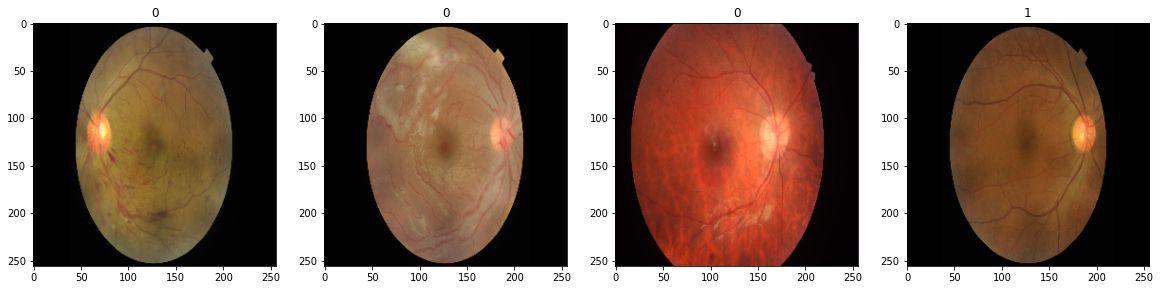

In [21]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 10. scale data 

In [28]:
# reduces values in batch from 0-255 to 0-1
data=data.map(lambda x,y:(x/255,y))
scaled = data.as_numpy_iterator()
batch = scaled.next()
batch[0].max()

6.0308636e-08

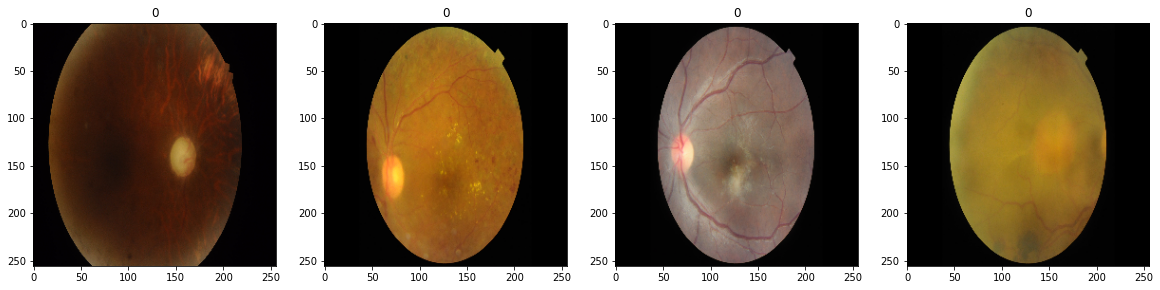

In [25]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [29]:
# len(data)
# train = data.take(len(data)) 
# splitting batches accordingly (not required as subdirectories already created)

60

# 11. build deep learning model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [33]:
model= Sequential()

In [34]:
# 16 - number of filters
# (3,3) - filter size
# 1 - stride of filter
# relu activation - converts negative numbers to 0 (rectified linear activation)
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
# condenses data 
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu' ))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu' ))
model.add(MaxPooling2D())

# condensing into single output
model.add(Flatten())

model.add(Dense(256, activation='relu'))
# sigmoid activation - maps to a range between 0 to 1
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 12. train the model

In [37]:
# creation of a log directory to log information about the model
os.mkdir(os.path.join(os.getcwd(),'logs'))
logdir='logs'

In [40]:
# creation of a callback
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [41]:
# epochs - number of runs across all batches
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
60/60 [==============================] - 55s 830ms/step - loss: 3.8369 - accuracy: 0.7859 - val_loss: 0.4593 - val_accuracy: 0.8141
Epoch 2/20
60/60 [==============================] - 51s 805ms/step - loss: 0.4449 - accuracy: 0.8292 - val_loss: 0.4461 - val_accuracy: 0.8250
Epoch 3/20
60/60 [==============================] - 52s 825ms/step - loss: 0.4397 - accuracy: 0.8370 - val_loss: 0.4828 - val_accuracy: 0.8031
Epoch 4/20
60/60 [==============================] - 51s 794ms/step - loss: 0.4269 - accuracy: 0.8396 - val_loss: 0.4552 - val_accuracy: 0.8281
Epoch 5/20
60/60 [==============================] - 51s 799ms/step - loss: 0.4222 - accuracy: 0.8333 - val_loss: 0.4677 - val_accuracy: 0.8219
Epoch 6/20
60/60 [==============================] - 51s 800ms/step - loss: 0.4105 - accuracy: 0.8417 - val_loss: 0.4563 - val_accuracy: 0.8188
Epoch 7/20
60/60 [==============================] - 52s 812ms/step - loss: 0.4099 - accuracy: 0.8453 - val_loss: 0.4468 - val_accuracy: 0.8250

In [42]:
hist.history

{'loss': [3.8368518352508545,
  0.4448690116405487,
  0.43969374895095825,
  0.42685022950172424,
  0.42224544286727905,
  0.4105255901813507,
  0.40989914536476135,
  0.40943145751953125,
  0.4042801856994629,
  0.3937419354915619,
  0.38529565930366516,
  0.38661548495292664,
  0.3936139941215515,
  0.4020424485206604,
  0.3787286877632141,
  0.3603428602218628,
  0.3760160803794861,
  0.3641769289970398,
  0.36254799365997314,
  0.355644553899765],
 'accuracy': [0.785937488079071,
  0.8291666507720947,
  0.8369791507720947,
  0.8395833373069763,
  0.8333333134651184,
  0.8416666388511658,
  0.8453124761581421,
  0.8374999761581421,
  0.8395833373069763,
  0.8421875238418579,
  0.8510416746139526,
  0.8500000238418579,
  0.8401041626930237,
  0.8432291746139526,
  0.8515625,
  0.8526041507720947,
  0.8531249761581421,
  0.856249988079071,
  0.8536458611488342,
  0.8583333492279053],
 'val_loss': [0.4593023657798767,
  0.44610947370529175,
  0.48275789618492126,
  0.4551936984062195,
